In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
xr.__version__

'2024.3.0'

In [3]:
ncd = xr.open_mfdataset("out/d/d_*.nc", data_vars="minimal", combine='by_coords', parallel=True )
ncd

<xarray.Dataset> Size: 3MB
Dimensions:    (longitude: 650, latitude: 590)
Coordinates:
    time       int64 8B 0
  * longitude  (longitude) float64 5kB 158.7 158.9 159.0 ... 245.0 245.1 245.3
  * latitude   (latitude) float64 5kB 69.27 69.13 69.0 ... -9.0 -9.133 -9.267
Data variables:
    d          (latitude, longitude) float64 3MB dask.array<chunksize=(197, 163), meta=np.ndarray>

Text(0.5, 1.0, 'Bathymetry')

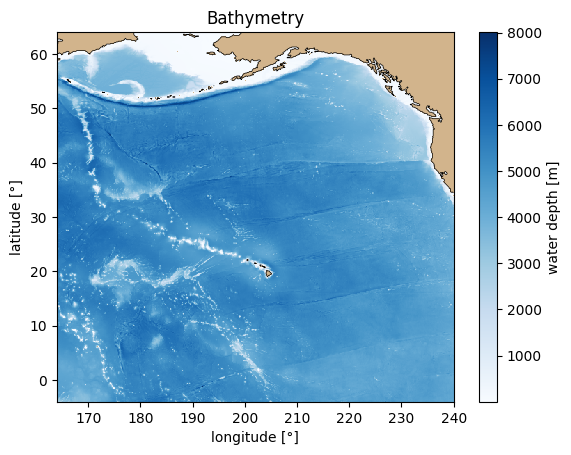

In [4]:
dep0 = ncd.d[40:-40,40:-40].copy()
depN = dep0.copy()
depN.data[depN.data==0]=np.nan
cmap=plt.cm.Blues
cmap.set_bad("tan")
fig,ax=plt.subplots()
depN.plot(ax=ax,cmap=cmap)
dep0.plot.contour(ax=ax, levels=[0], linewidths=0.5, colors="k")
ax.set_title("Bathymetry")

In [5]:
nchmax = xr.open_mfdataset("out/hmax/*.nc", data_vars="minimal", combine='by_coords', parallel=True )
hmax = nchmax.hmax[40:-40,40:-40].copy()
hmax.data[dep0.data==0]=np.nan

Text(0.5, 1.0, 'Maximum tsunami height')

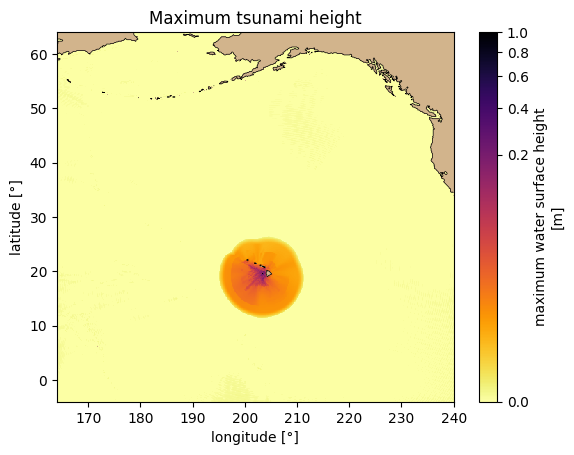

In [6]:
cmap = plt.cm.inferno_r
cmap.set_bad("tan")
fig, ax = plt.subplots()
hmax.plot(ax=ax, cmap=cmap, norm=colors.PowerNorm(0.25))
dep0.plot.contour(ax=ax, levels=[0], linewidths=0.5, colors="k")
ax.set_title("Maximum tsunami height")

In [8]:
nch = xr.open_mfdataset("out/h/*.nc", data_vars="minimal", combine='by_coords', parallel=True )
nch

<xarray.Dataset> Size: 18MB
Dimensions:    (time: 6, longitude: 650, latitude: 590)
Coordinates:
  * time       (time) float64 48B 0.0 600.0 1.2e+03 1.8e+03 2.4e+03 3e+03
  * longitude  (longitude) float64 5kB 158.7 158.9 159.0 ... 245.0 245.1 245.3
  * latitude   (latitude) float64 5kB 69.27 69.13 69.0 ... -9.0 -9.133 -9.267
Data variables:
    h          (time, latitude, longitude) float64 18MB dask.array<chunksize=(6, 197, 163), meta=np.ndarray>

(6, 510, 570) (510, 570)


<Figure size 1200x500 with 0 Axes>

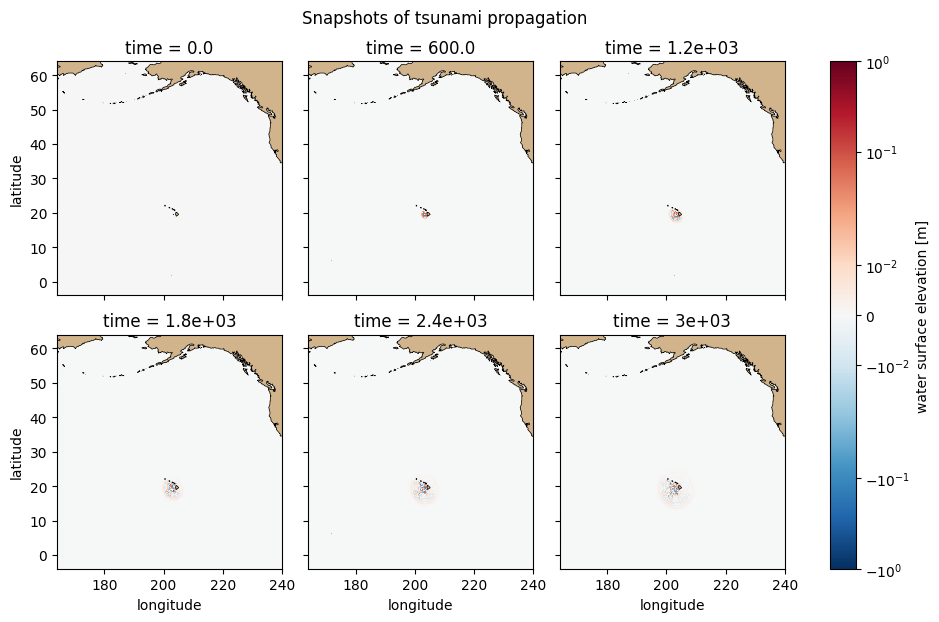

In [10]:
h = nch.h[:,40:-40,40:-40].isel(time=slice(0,6,1)).copy()
print(h.data.shape, dep0.data.shape)
h.data[dep0.data==0]=np.nan
cmap = plt.cm.RdBu_r
cmap.set_bad("tan")
fig = plt.figure(figsize=(12,5))
axs = h.plot(x="longitude", y="latitude", col="time", cmap=cmap, col_wrap=3, 
             norm=colors.SymLogNorm(linthresh=0.02, vmin=-1, vmax=1),
            )
for ax in axs.axs.ravel():
    xlabel = ax.get_xlabel()
    ylabel = ax.get_ylabel()
    title = ax.get_title()
    dep0.plot.contour(ax=ax, levels=[0], linewidths=0.5, colors="k")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
fig.tight_layout()
plt.suptitle("Snapshots of tsunami propagation", x=0.45, y=1.03)
plt.show()

In [11]:
wf = np.load("./out/timeseries00_station0011.npz")
plt.plot(wf["t"]/3600, wf["h"])
plt.xlim(5,7)


FileNotFoundError: [Errno 2] No such file or directory: './out/timeseries00_station0011.npz'